In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/fruit_data_with_colors.txt'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, plot, init_notebook_mode, iplot
init_notebook_mode(connected=True)
cf.go_offline()
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import model_selection

In [3]:
fruits_df = pd.read_table("/content/fruit_data_with_colors.txt")
fruits_df.head()
fruits_df.shape

(59, 7)

In [4]:
fruits_df.isna().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [5]:
trace = go.Scatter(x=fruits_df["mass"], y=fruits_df["height"]/fruits_df["width"], mode="markers", hovertext=fruits_df["fruit_name"], marker=dict(size=12, color=fruits_df["fruit_label"],))
fig = go.Figure(data=[trace])
fig.update_layout(title="Fruits Classification based on Dimensions")
fig.update_xaxes(title="Mass")
fig.update_yaxes(title="Height/Width")
iplot(fig)

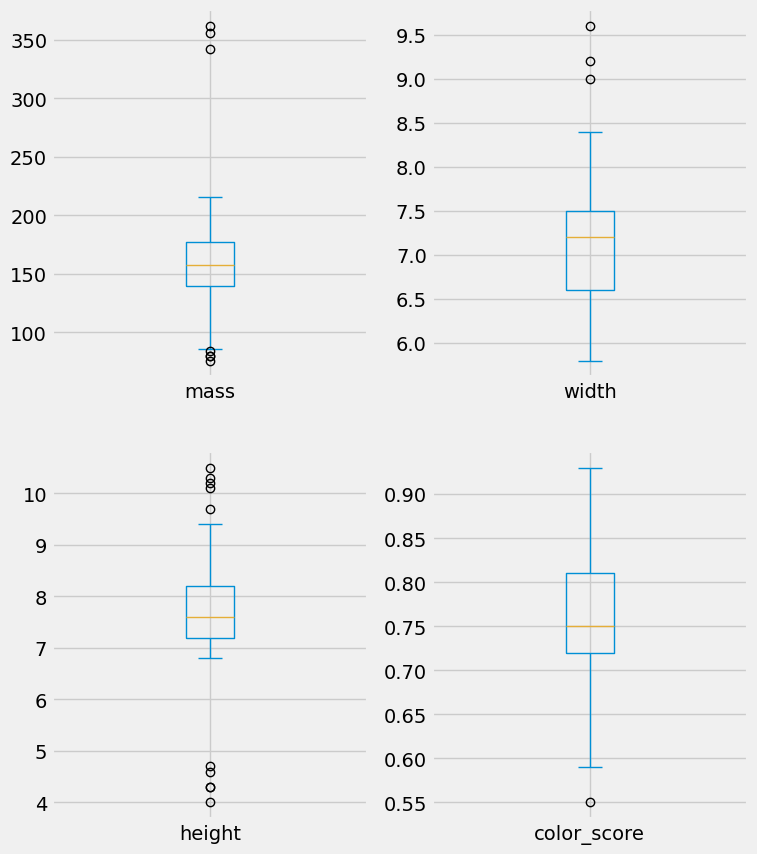

In [6]:
from matplotlib import style
style.use("fivethirtyeight")
fruits_df.drop(["fruit_label"], axis=1).plot(kind="box", layout=(2,2), figsize=(8,10), subplots=True, sharey=False)
plt.show()

In [7]:
fruits_df["fruit_name"].value_counts()

fruit_name
apple       19
orange      19
lemon       16
mandarin     5
Name: count, dtype: int64

array([[<Axes: xlabel='mass', ylabel='mass'>,
        <Axes: xlabel='width', ylabel='mass'>,
        <Axes: xlabel='height', ylabel='mass'>,
        <Axes: xlabel='color_score', ylabel='mass'>],
       [<Axes: xlabel='mass', ylabel='width'>,
        <Axes: xlabel='width', ylabel='width'>,
        <Axes: xlabel='height', ylabel='width'>,
        <Axes: xlabel='color_score', ylabel='width'>],
       [<Axes: xlabel='mass', ylabel='height'>,
        <Axes: xlabel='width', ylabel='height'>,
        <Axes: xlabel='height', ylabel='height'>,
        <Axes: xlabel='color_score', ylabel='height'>],
       [<Axes: xlabel='mass', ylabel='color_score'>,
        <Axes: xlabel='width', ylabel='color_score'>,
        <Axes: xlabel='height', ylabel='color_score'>,
        <Axes: xlabel='color_score', ylabel='color_score'>]], dtype=object)

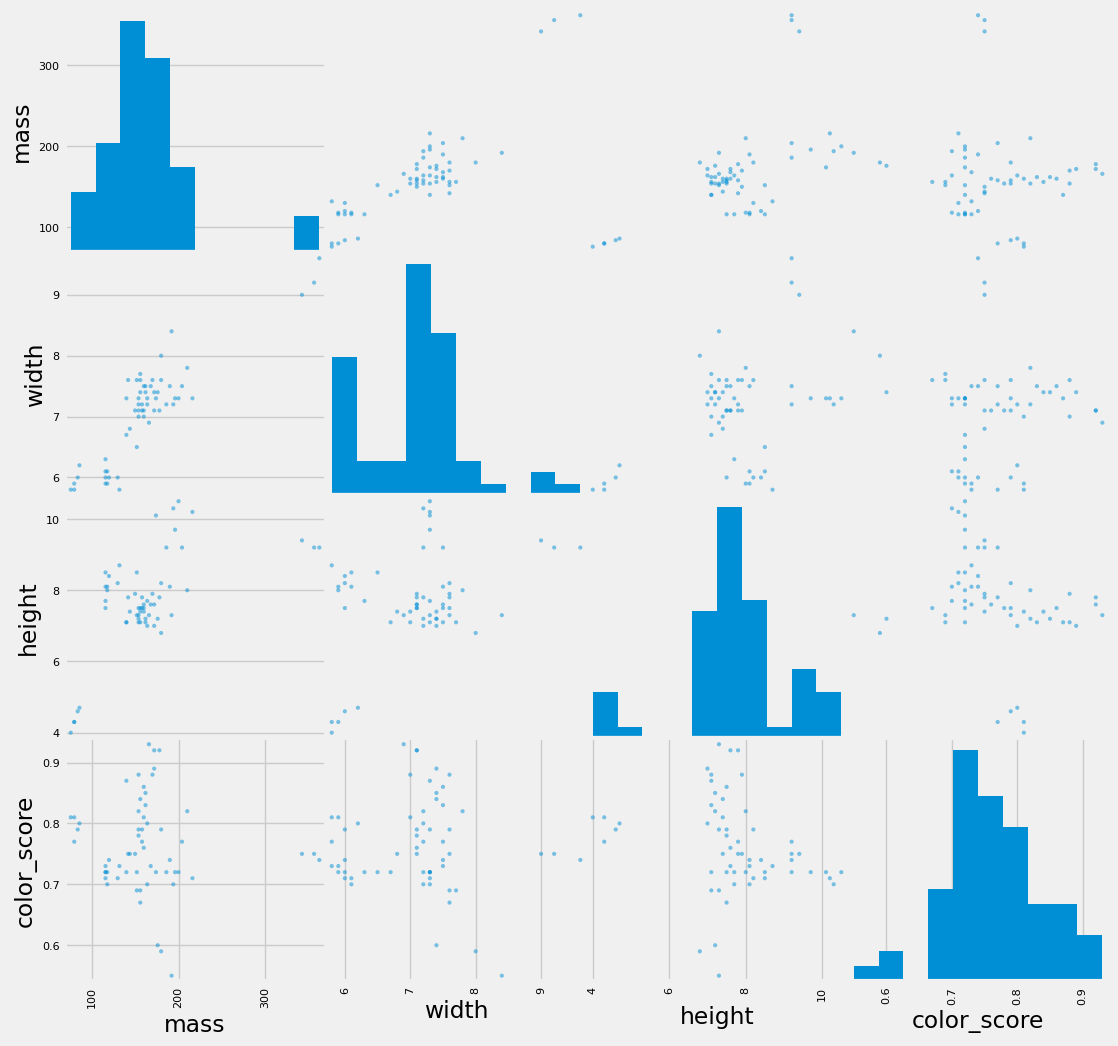

In [8]:
from pandas.plotting import scatter_matrix
atts = ["mass", "width", "height", "color_score"]
scatter_matrix(fruits_df[atts], figsize=(12,12))

In [9]:
fruits_corr = fruits_df.select_dtypes(include=['number']).corr()
fruits_corr["mass"]

fruit_label    0.032738
mass           1.000000
width          0.877687
height         0.609571
color_score   -0.079794
Name: mass, dtype: float64

In [10]:
fruits_corr = fruits_df.select_dtypes(include=['number']).corr()
fruits_corr["fruit_label"]

fruit_label    1.000000
mass           0.032738
width         -0.298090
height         0.508766
color_score   -0.310521
Name: fruit_label, dtype: float64

In [11]:
fruits_df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [12]:
minmax_scaler = preprocessing.MinMaxScaler()

In [13]:
fruits_minmax_scaled = minmax_scaler.fit_transform(
    fruits_df.drop(["fruit_label","fruit_name","fruit_subtype"], axis=1)
)

In [14]:
fruits_df_scaled = pd.DataFrame(fruits_minmax_scaled, columns=fruits_df.columns[3:])
fruits_df_scaled.head()

,mass,width,height,color_score
0,0.405594,0.684211,0.507692,0.000000
1,0.363636,0.578947,0.430769,0.105263
2,0.349650,0.421053,0.492308,0.131579
3,0.034965,0.105263,0.107692,0.657895
4,0.027972,0.052632,0.092308,0.631579


In [15]:
fruits_df_scaled.describe()

,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000
mean,0.304611,0.343443,0.568188,0.560214
std,0.192374,0.214984,0.209387,0.202257
min,0.000000,0.000000,0.000000,0.000000
25%,0.223776,0.210526,0.492308,0.447368
50%,0.286713,0.368421,0.553846,0.526316
75%,0.353147,0.447368,0.646154,0.684211
max,1.000000,1.000000,1.000000,1.000000


In [16]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(fruits_df_scaled, fruits_df["fruit_label"], test_size=0.2)

In [17]:
print(X_train.shape)
print(X_test.shape)

(47, 4)
(12, 4)


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
logis_reg = LogisticRegression()
logis_reg.fit(X_train, y_train)
accuracy = logis_reg.score(X_test, y_test)
print(accuracy)

0.8333333333333334


In [19]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

1.0


In [20]:
error_rate = []
for i in range(1,20):
 clf = KNeighborsClassifier(n_neighbors=i)
 clf.fit(X_train,y_train)
 pred_i = clf.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))
 print(error_rate)

[0.0]
[0.0, 0.0]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08333333333333333]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08333333333333333, 0.16666666666666666]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08333333333333333, 0.16666666666666666, 0.16666666666666666]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08333333333333333, 0.16666666666666666, 0.16666666666666666, 0.25]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08333333333333333, 0.16666666666666666, 0.16666666666666666, 0.25, 0.16666666666666666]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08333333333333333, 0.16666666666666666, 0.16666666666666666, 0.25, 0.16666666666666666, 0.25]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08333333333333333, 0.16666666666666666, 0.16666666666666666, 0.25, 0.16666666666666666, 0.25, 0.4166666666666667]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.

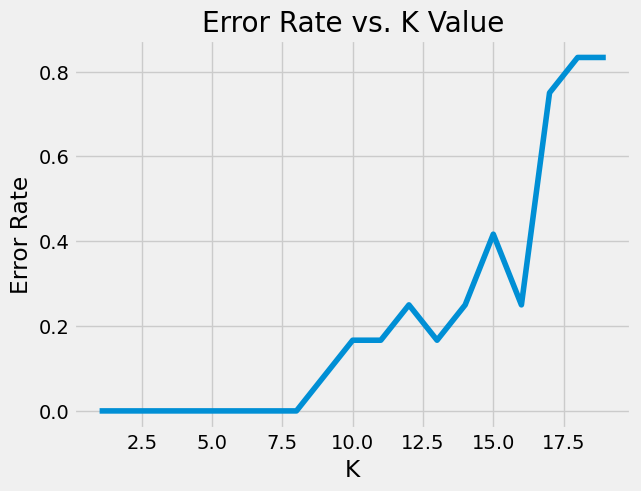

In [21]:
plt.plot(range(1,20),error_rate)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()

In [22]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [23]:
sgd_accuracy = sgd_clf.score(X_test, y_test)
print(sgd_accuracy)

0.6666666666666666


In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
rfc_accuracy = rfc.score(X_test, y_test)
print(rfc_accuracy)

1.0


In [27]:
y_test.value_counts()

fruit_label
4    4
3    4
1    4
Name: count, dtype: int64

In [28]:
y_test_prediction = rfc.predict(X_test)
print(y_test_prediction)

[4 3 3 1 3 4 4 1 4 3 1 1]


In [29]:
from sklearn.metrics import confusion_matrix
conf_mat_rfc = confusion_matrix(y_test, y_test_prediction)
print(conf_mat_rfc)

[[4 0 0]
 [0 4 0]
 [0 0 4]]


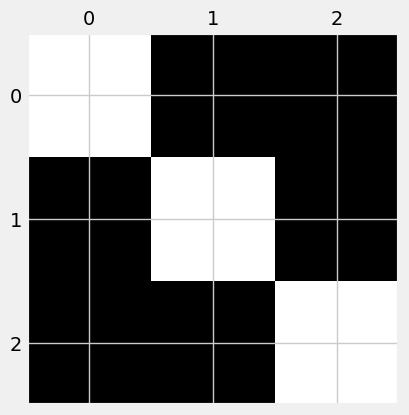

In [30]:
plt.matshow(conf_mat_rfc, cmap=plt.cm.gray)
plt.show()

In [31]:
from sklearn import metrics
print(metrics.precision_score(y_test, y_test_prediction, average="weighted"))

1.0


In [32]:
print(metrics.recall_score(y_test, y_test_prediction, average="weighted"))

1.0
